# SO(3)/$\mathbb{S_3}$ valued data, on grid-graph, i.e. SO(3)/$\mathbb{S_3}$-image

### arXiv: [Denoising of Sphere- and SO(3)-Valued Data by Relaxed Tikhonov Regularization](https://arxiv.org/abs/2307.10980)

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.interpolate import RegularGridInterpolator
import scipy as sc
import scipy.stats
import time
from scipy import interpolate
import matplotlib.gridspec
from scipy.interpolate import CubicSpline
from scipy.stats import vonmises
from scipy.stats import vonmises_fisher
import imp
import relaxed_tikhonov_sphere_image

import condat_tv

iter = 300
rho = 1
tau = 0.1

In [4]:
imp.reload(relaxed_tikhonov_sphere_image)

<module 'relaxed_tikhonov_sphere_image' from '/Users/jonasbresch/Desktop/cycle valued data/python/finale/github/relaxed_tikhonov_sphere_image.py'>

### Generating signals 

- Data : thruth signal 
- Noise : noised signal by Von-Mises-Fisher

In [5]:
#Noise, Data = smap_vMF_image(10,3.5)

Noise, Data = relaxed_tikhonov_sphere_image.sample_SO3_image(10)

In [6]:
[a0, p0, t0] = relaxed_tikhonov_sphere_image.angle_SO3(Data)
[a, p, t] = relaxed_tikhonov_sphere_image.angle_SO3(Noise)

In [7]:
Noise_trans, backtranset21, backtranset22 = relaxed_tikhonov_sphere_image.transformation_SO3(Noise)
Data_trans, backtranset021, backtranset022 = relaxed_tikhonov_sphere_image.transformation_SO3(Data)

[aa0, pp0, tt0] = relaxed_tikhonov_sphere_image.angle_SO3(Data_trans)
[aa, pp, tt] = relaxed_tikhonov_sphere_image.angle_SO3(Noise_trans)

### Main algorithm

- ADMM_red : solving the proposed simplified and generalized convex optimization problem in ...
- PMM : solving the complex-valued S_1-model proposed by Condat ...
- BASELINE : solving the state-of-the-art ball-relaxed problem 
- ADMM_TV_BOX . solving the rely TV problem 

In [8]:
q, qn, qdata, qres1, qres2, qtime = relaxed_tikhonov_sphere_image.ADMM_red(Noise_trans, Data_trans, 1*iter+1, 1, 3*rho, 5)

iteration 	| func-value 	| non-convex-cost 	| spherical-error
--------------------------------------------------------------------------
0 		|   2.111e+04 	|   1.750e+03 		|  9.577e-01
100 		|   6.058e+02 	|   3.567e+02 		|  1.861e-03
200 		|   6.020e+02 	|   3.609e+02 		| -9.795e-08
300 		|   6.020e+02 	|   3.613e+02 		| -5.794e-09
finale 		|  6.020e+02 				|  sphered
300 602.0067924452773 187.03469586372375


In [18]:
print('MAE(Solution) = ', "%10.3e"%(np.sum(np.abs(q-Data))/np.size(q[0,:,:])), '\t| MAE(Noise) = ', "%10.3e"%(np.sum(np.abs(Noise-Data))/np.size(q[0,:,:])))
print('cMSE(Solution) = ', "%10.3e"%(np.sum(np.arccos(np.sum((q*Data),0))**2)/np.size(q[0,:,:])), '\t| cMSE(Noise) = ', "%10.3e"%(np.sum(np.arccos(np.sum((Noise*Data),0))**2)/np.size(q[0,:,:])))

MAE(Solution) =   2.559e-01 	| MAE(Noise) =   3.740e-01
cMSE(Solution) =   9.065e-02 	| cMSE(Noise) =   1.849e-01


In [9]:
qW2, qX2, qY2, qZ2, datapmm = relaxed_tikhonov_sphere_image.PMM_S2S3_2D(Noise_trans, Data_trans, 1, iter+1, tau, rho, 0, 5)

iteration 	| func-value 	| original-cost 	| spherical-error
---------------------------------------------------------------------------
0 		|   2.317e+04 	|   2.321e+04 		|   9.000e-01
100 		|   5.968e+02 	|   5.356e+02 		|  -1.319e-04
200 		|   6.020e+02 	|   5.427e+02 		|   3.176e-07
300 		|   6.020e+02 	|   5.428e+02 		|  -4.502e-10
296 602.0060873877801 215.8332679271698


In [68]:
q, qz = relaxed_tikhonov_sphere_image.ADMM_TV_BOX(Noise_trans, Data_trans, 0.14, 100, 10000)

iter. 	| funv-value 		| RMSE 		| error 	| spherical-error
----------------------------------------------------------------------------------
0  	|   7.956e+03  	|   9.818e-01  	|   8.449e-01  	|   8.916e+01
100  	|   7.679e+02  	|   5.107e-02  	|   8.381e-01  	|   7.507e+00
200  	|   8.087e+02  	|   6.112e-02  	|   2.347e-02  	|   7.887e-01
300  	|   8.109e+02  	|   6.262e-02  	|   5.308e-03  	|   6.122e-02
400  	|   8.111e+02  	|   6.270e-02  	|   1.338e-03  	|   1.464e-04
500  	|   8.112e+02  	|   6.272e-02  	|   6.406e-04  	|   2.171e-04
600  	|   8.113e+02  	|   6.273e-02  	|   3.718e-04  	|   2.096e-04
700  	|   8.113e+02  	|   6.273e-02  	|   2.376e-04  	|   2.177e-04
800  	|   8.113e+02  	|   6.274e-02  	|   2.356e-04  	|   1.296e-04
900  	|   8.113e+02  	|   6.274e-02  	|   2.793e-04  	|   1.258e-04
1000  	|   8.113e+02  	|   6.274e-02  	|   2.542e-04  	|   1.544e-04
1100  	|   8.113e+02  	|   6.274e-02  	|   2.181e-04  	|   2.156e-04
1200  	|   8.113e+02  	|   6.274e-02  	|   

Traceback (most recent call last):
  File "/Users/jonasbresch/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/x8/2j6ym0tn7x18f9h9pmv136mc0000gn/T/ipykernel_13552/2073974929.py", line 1, in <module>
    q, qz = relaxed_tikhonov_sphere_image.ADMM_TV_BOX(Noise_trans, Data_trans, 0.14, 100, 10000)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/jonasbresch/Desktop/cycle valued data/python/finale/github/relaxed_tikhonov_sphere_image.py", line 895, in ADMM_TV_BOX
    u = proj_B1(x + z)
        ^^^^^^^^^^^^^^
  File "/Users/jonasbresch/Desktop/cycle valued data/python/finale/github/relaxed_tikhonov_sphere_image.py", line -1, in proj_B1
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/jonasbresch/Library/Python/3.11

In [57]:
print('cMSE(Solution) = ', "%10.3e"%(np.sum(np.arccos(np.sum(np.abs(q*Data),0))**2)/np.size(q[0,:,:])), '\t| cMSE(Noise) = ', "%10.3e"%(np.sum(np.arccos(np.sum(q*Data,0))**2)/np.size(q[0,:,:])))

cMSE(Solution) =   5.529e-02 	| cMSE(Noise) =   7.051e-02


In [19]:
qq = relaxed_tikhonov_sphere_image.back_transformation_SO3(q, backtranset21, backtranset22)

In [22]:
p1, datappa = relaxed_tikhonov_sphere_image.baseline(Noise, Data, 1, 10*iter+1, 0)

24120.0
iteration 	| func-value 	| original-cost 	| solution is
-------------------------------------------------------------------
0 		|   2.304e+04 	|   2.309e+04 		| unsphered
50 		|   3.573e+03 	|   3.534e+03 		| unsphered
100 		|   3.501e+03 	|   3.461e+03 		| unsphered
150 		|   3.501e+03 	|   3.461e+03 		| unsphered
200 		|   3.501e+03 	|   3.461e+03 		| unsphered
250 		|   3.501e+03 	|   3.461e+03 		| unsphered
300 		|   3.501e+03 	|   3.461e+03 		| unsphered
350 		|   3.501e+03 	|   3.461e+03 		| unsphered
400 		|   3.501e+03 	|   3.461e+03 		| unsphered
450 		|   3.501e+03 	|   3.461e+03 		| unsphered
500 		|   3.501e+03 	|   3.461e+03 		| unsphered
550 		|   3.501e+03 	|   3.461e+03 		| unsphered
600 		|   3.501e+03 	|   3.461e+03 		| unsphered
650 		|   3.501e+03 	|   3.461e+03 		| unsphered
700 		|   3.501e+03 	|   3.461e+03 		| unsphered
750 		|   3.501e+03 	|   3.461e+03 		| unsphered
800 		|   3.501e+03 	|   3.461e+03 		| unsphered
850 		|   3.501e+03 	|   3.461e+03 		|

/Users/jonasbresch/Desktop/cycle valued data/python/finale/github/relaxed_tikhonov_sphere_image.py:1843: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax.plot(i,j,'ko', markersize=1.5 , color=lighten_color([(p0[i,j]-np.min(p0))/(np.max(p0)-np.min(p0)),1.0,0.0], 0.5+1.*(t0[i,j]-np.min(t0))/(np.max(t0)-np.min(t0))), label=['phi', 'theta'])
/Users/jonasbresch/Desktop/cycle valued data/python/finale/github/relaxed_tikhonov_sphere_image.py:1854: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  ax1.plot(i,j, 'ko', markersize=1.5 , color=lighten_color([(p[i,j]-np.min(p))/(np.max(p)-np.min(p)),1.0,0.0], 0.5+1.*(t[i,j]-np.min(t))/(np.max(t)-np.min(t))), label=['phi', 'theta'])
/Users/jonasbresch/Desktop/cycle valued data/python/finale/github/relaxed_tikhonov_sphere_image.py:1

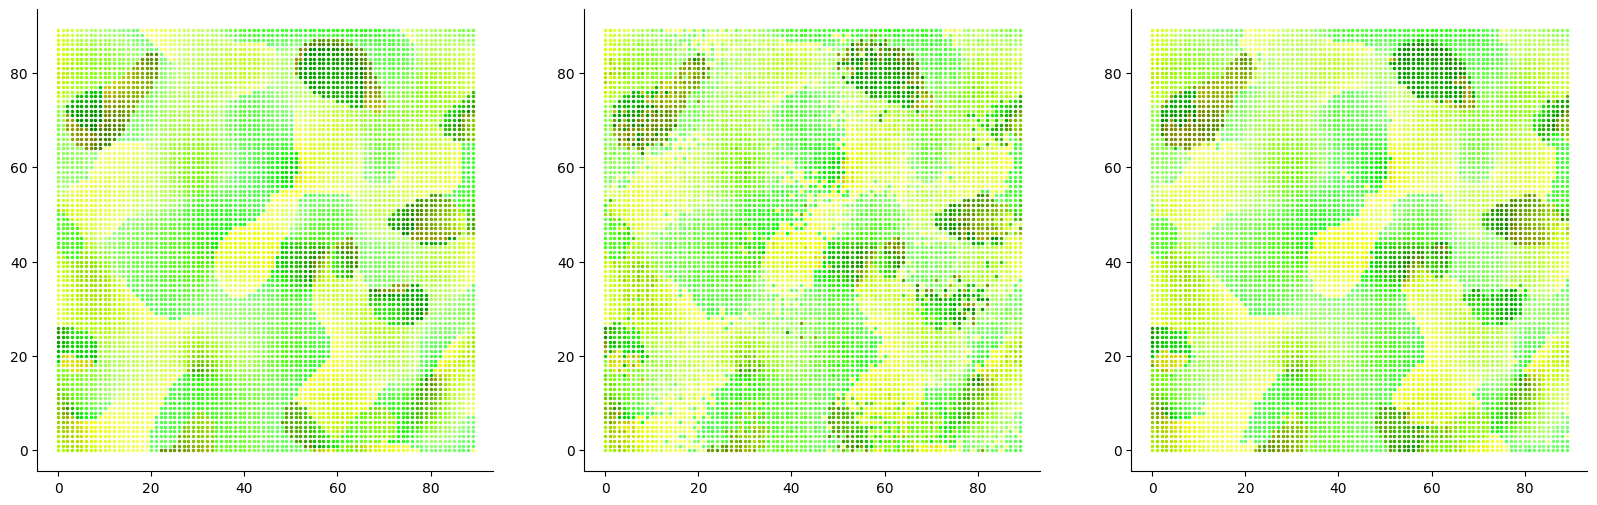

In [21]:
relaxed_tikhonov_sphere_image.plotSO3_image(Noise, Data, qq)

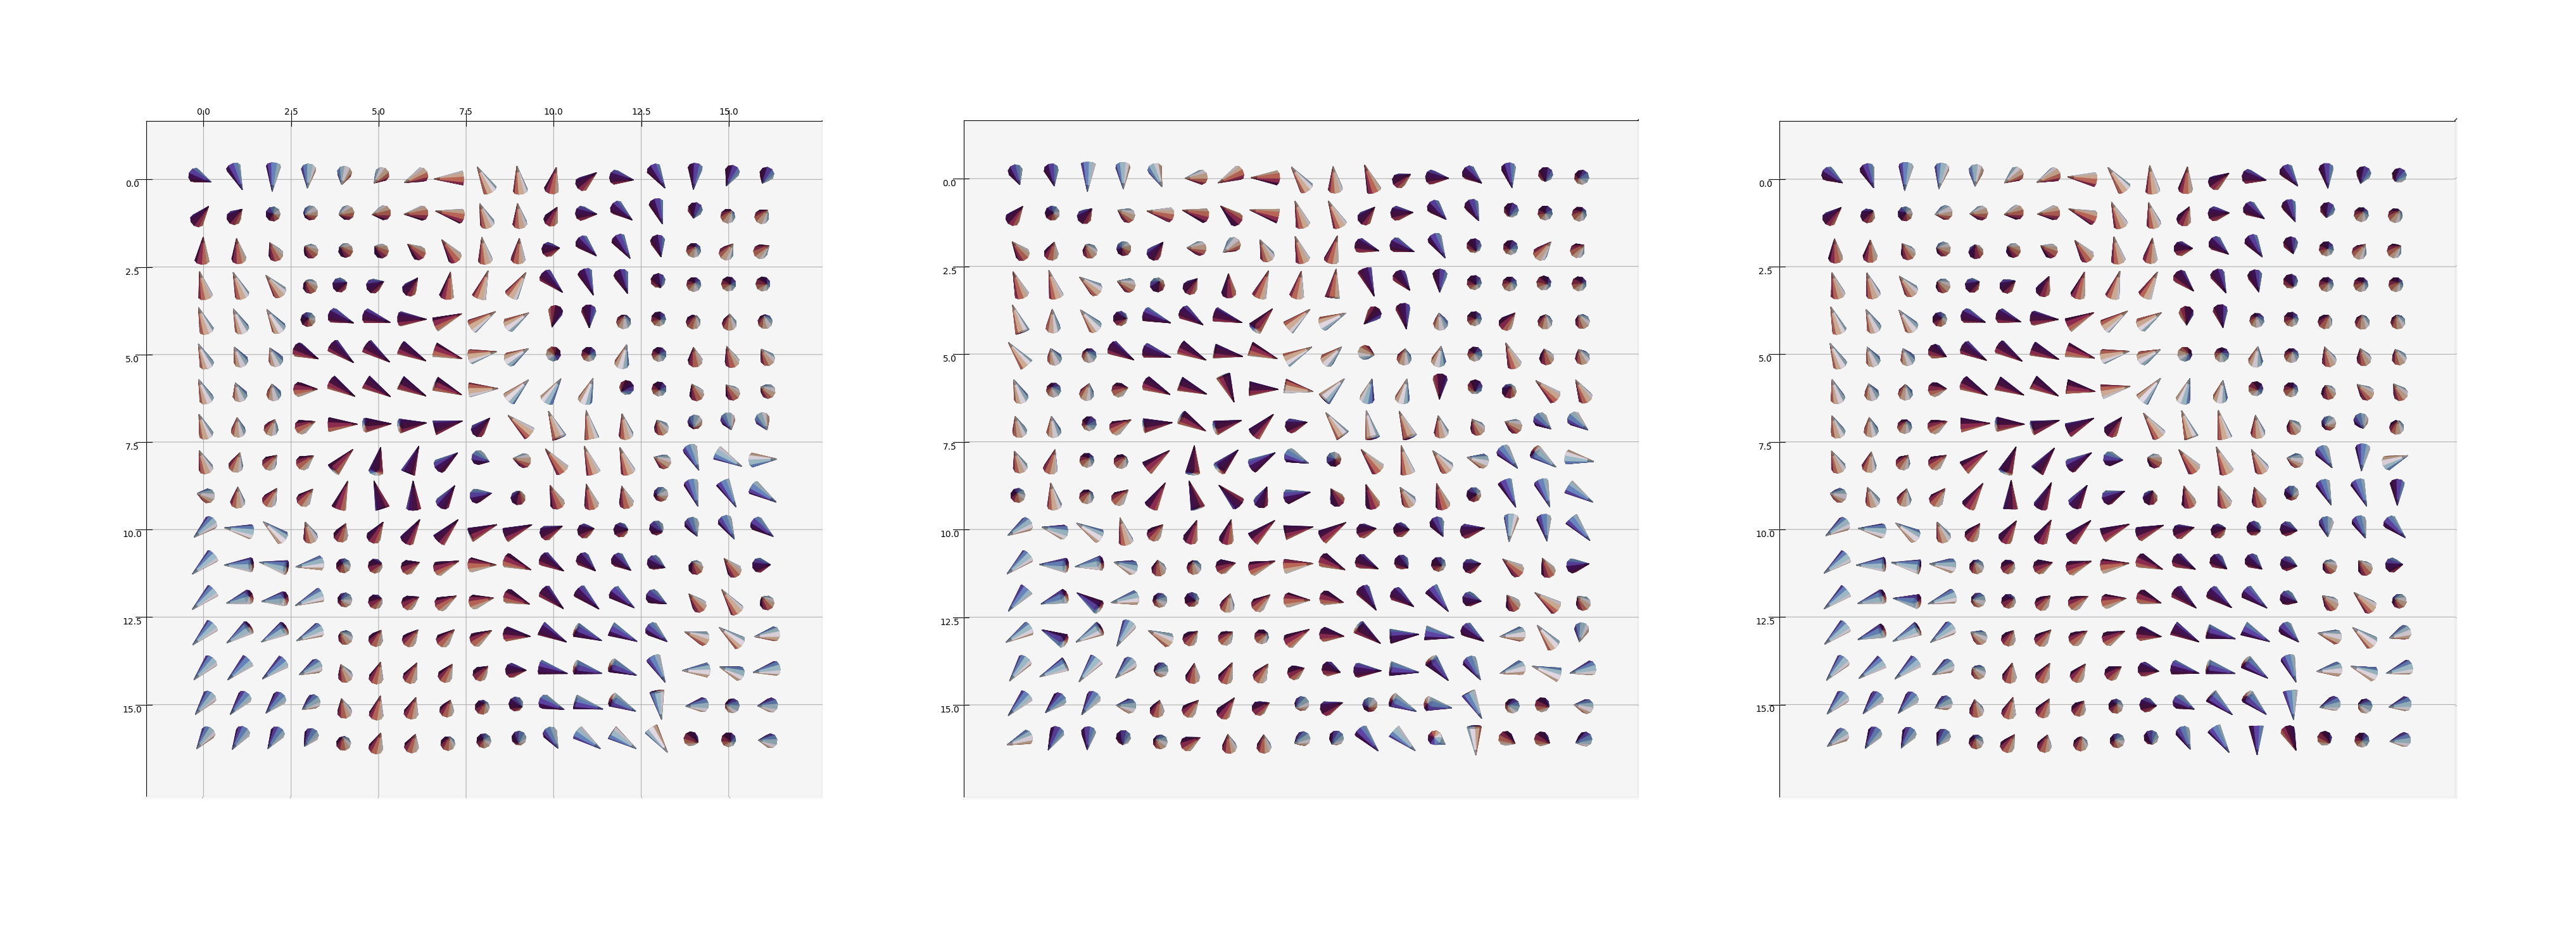

In [20]:
relaxed_tikhonov_sphere_image.plotSO3_image_cones(Noise, Data, qq)